In [2]:
!pip install matplotlib

  Using cached matplotlib-3.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (305 kB)
  Using cached fonttools-4.53.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached pillow-10.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


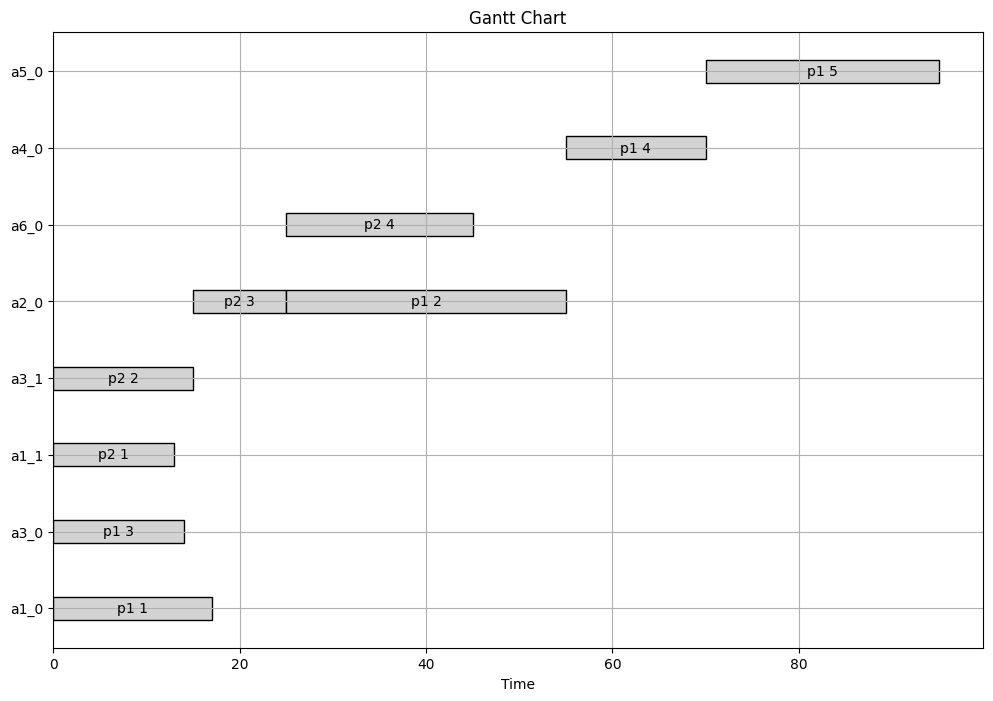

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Daten definieren
data = [
['p1', 1, 'a1_0', 0, 17, 17],
['p1', 3, 'a3_0', 0, 14, 14],
['p2', 1, 'a1_1', 0, 13, 13],
['p2', 2, 'a3_1', 0, 15, 15],
['p2', 3, 'a2_0', 15, 10, 25],
['p1', 2, 'a2_0', 25, 30, 55],
['p2', 4, 'a6_0', 25, 20, 45],
['p1', 4, 'a4_0', 55, 15, 70],
['p1', 5, 'a5_0', 70, 25, 95],
]

#[current_task.job_id, current_task.task_id, machine, start_time, current_task.duration , end_time]
# Daten in ein DataFrame konvertieren
df = pd.DataFrame(data, columns=['job_id', 'task_id', 'machine', 'start_time', 'duration', 'end_time'])

# Gantt-Diagramm erstellen
fig, ax = plt.subplots(figsize=(12, 8))

# Maschinen als y-Werte für die Balken
machines = df['machine'].unique()
machine_to_y = {machine: i for i, machine in enumerate(machines)}

# Iteriere über jede Zeile des DataFrames
for i, row in df.iterrows():
    start = row['start_time']
    duration = row['duration']
    job_id = row['job_id']
    task_id = row['task_id']
    machine = row['machine']
    label = f'{job_id} {task_id}'

    # Stelle die Aufgabe als Balken im Diagramm dar
    ax.barh(y=machine_to_y[machine], left=start, width=duration, height=0.3, align='center', color='lightgrey', edgecolor='black')
    
    # Text in den Balken einfügen
    ax.text(x=start + duration / 2, y=machine_to_y[machine], s=label, va='center', ha='center', color='black')

# Diagramm formatieren
ax.set_xlabel('Time')
ax.set_yticks(list(machine_to_y.values()))
ax.set_yticklabels(list(machine_to_y.keys()))
ax.set_title('Gantt Chart')

# Grid anzeigen
ax.grid(True)

# Legende entfernen, da sie nicht mehr notwendig ist
# Handles und Labels der Legende deduplizieren
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# Diagramm anzeigen
plt.show()


In [6]:
class Task:
    """Task with job id, task id, machine, time, next task, planned start"""

    def __init__(self, job_id, task_id, machine, time, next_task, planned_start):
        self.job_id = job_id
        self.task_id = task_id
        self.machine = machine
        self.time = time
        self.next_task = next_task
        self.planned_start = planned_start
        self.successor_task = None
        self.predecessor_tasks = []

    def __repr__(self):
        return f"Task(job_id='{self.job_id}', task_id={self.task_id}, machine='{self.machine}', " \
               f"time={self.time}, next_task={self.next_task}, planned_start={self.planned_start})"


# Beispielhafte Datenstruktur
jobs_data = [
    ['p1', 1, 'a1', 17, 2, None],
    ['p1', 2, 'a2', 30, 4, None],
    ['p1', 3, 'a3', 14, 4, None],
    ['p1', 4, 'a4', 15, 5, None],
    ['p1', 5, 'a5', 25, -1, None],
    ['p2', 1, 'a1', 13, 3, None],
    ['p2', 2, 'a3', 15, 3, None],
    ['p2', 3, 'a2', 10, 4, None],
    ['p2', 4, 'a6', 20, -1, None],
]

# Konvertiere die jobs_data in Task-Objekte
tasks = []
task_dict = {}

for job_id, task_id, machine, time, next_task, planned_start in jobs_data:
    task = Task(job_id, task_id, machine, time, next_task, planned_start)
    tasks.append(task)
    task_dict[(job_id, task_id)] = task

# Setze die Referenzen zu Successor und Predecessor Tasks
for task in tasks:
    if task.next_task != -1:
        next_task = task_dict[(task.job_id, task.next_task)]
        task.successor_task = next_task
        next_task.predecessor_tasks.append(task)

# Testausgabe der erstellten Task-Objekte
for task in tasks:
    print(task)
    if task.successor_task:
        print(f"Successor: {task.successor_task}")
    if task.predecessor_tasks:
        print(f"Predecessors: {[p for p in task.predecessor_tasks]}")
    print()

Task(job_id='p1', task_id=1, machine='a1', time=17, next_task=2, planned_start=None)
Successor: Task(job_id='p1', task_id=2, machine='a2', time=30, next_task=4, planned_start=None)

Task(job_id='p1', task_id=2, machine='a2', time=30, next_task=4, planned_start=None)
Successor: Task(job_id='p1', task_id=4, machine='a4', time=15, next_task=5, planned_start=None)
Predecessors: [Task(job_id='p1', task_id=1, machine='a1', time=17, next_task=2, planned_start=None)]

Task(job_id='p1', task_id=3, machine='a3', time=14, next_task=4, planned_start=None)
Successor: Task(job_id='p1', task_id=4, machine='a4', time=15, next_task=5, planned_start=None)

Task(job_id='p1', task_id=4, machine='a4', time=15, next_task=5, planned_start=None)
Successor: Task(job_id='p1', task_id=5, machine='a5', time=25, next_task=-1, planned_start=None)
Predecessors: [Task(job_id='p1', task_id=2, machine='a2', time=30, next_task=4, planned_start=None), Task(job_id='p1', task_id=3, machine='a3', time=14, next_task=4, plann